# TREE DECISION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_curve, fbeta_score

In [2]:
import sys

import sys  
sys.path.insert(0, '../../../scripts/')

import eda_tools

## Data

In [3]:

full_train = pd.read_csv("../../../data/csev/model_5/trainCSEV.csv")
full_test = pd.read_csv("../../../data/csev/model_5/testCSEV.csv")

In [4]:
Y_train = full_train['C_SEV']
X_train = full_train.drop(['C_SEV'], axis=1)
Y_train.value_counts()

1    27796
0    27794
Name: C_SEV, dtype: int64

In [5]:
X_train.columns

Index(['C_RCFG', 'C_RSUR', 'C_RALN', 'C_TRAF', 'C_HOUR_N', 'C_CONF_O',
       'C_CONF_TO', 'C_CONF_TS'],
      dtype='object')

In [6]:
X_train = X_train.drop(['C_CONF_TO', 'C_CONF_O'], axis=1)
#X_train = X_train[['C_RCFG', 'C_RSUR', 'C_TRAF', 'C_HOUR_N', 'C_CONF_TS',
#                  'C_MNTH', 'C_WDAY']]

In [7]:
Y_test = full_test['C_SEV']
X_test = full_test.drop(['C_SEV'], axis=1)
Y_test.value_counts()

1    351139
0      6949
Name: C_SEV, dtype: int64

In [8]:
X_test = X_test.drop(['C_CONF_TO', 'C_CONF_O'], axis=1)
#X_test= X_test[['C_RCFG', 'C_RSUR', 'C_TRAF', 'C_HOUR_N', 'C_CONF_TS',
#                  'C_MNTH', 'C_WDAY']]

## Tree

In [9]:
treeModel = DecisionTreeClassifier(random_state=0)

In [10]:
treeModel.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [11]:
Y_pred = treeModel.predict(X_test)

## Evaluation

In [12]:
# Accuracy (no fiable)
metrics.accuracy_score(Y_test, Y_pred)

0.6606141507115569

Matriz de confusión
[[  4565   2384]
 [119146 231993]]
Matriz de confusión normalizada
[[0.65692905 0.34307095]
 [0.33931292 0.66068708]]


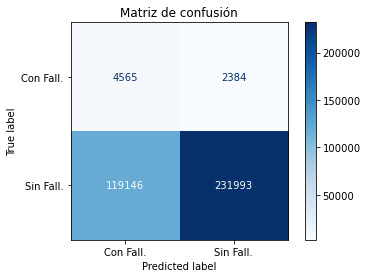

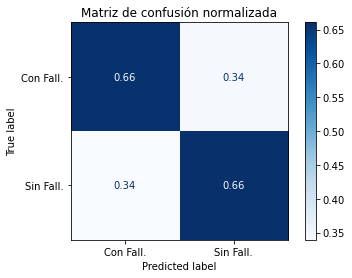

In [13]:
# Matrices de confusión
titles_options = [
    ("Matriz de confusión", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        treeModel,
        X_test,
        Y_test,
        display_labels=['Con Fall.', 'Sin Fall.'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [14]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.04      0.66      0.07      6949
           1       0.99      0.66      0.79    351139

    accuracy                           0.66    358088
   macro avg       0.51      0.66      0.43    358088
weighted avg       0.97      0.66      0.78    358088



In [15]:
# Especificidad
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print("Especificidad: ", tn / (tn+fp))

Especificidad:  0.6569290545402217


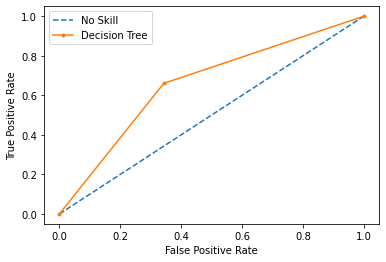

In [16]:
# Curva ROC
# keep probabilities for the positive outcome only
yhat = Y_pred
# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [17]:
fbeta_score(Y_test, Y_pred, average='binary', beta=2)

0.707756204799098